# Study of a graph : the drug network of Hartford, USA

A drug network has a particular intern structure and organisation. It aims to be optimal in the transfert of stupefiant and being, as much as it can, protected from the police. The goal of this study is to characterize the drug network of Hartford. The datas used in this report are a graph for which each node is a person taking part in the drug traffic and the edges are the acquaintanceship between those persons. This is the result of two years of ethnographic observations of people's drug habits. The datas come from the study [1] (cf bibliography).

After an introduction, the hierarchy of the traffic will be studied with different nodes centralities. Then, the particular structure of the drug traffic will be emphasized in order to see if it is optimized. Finally, the repartition of the ethnicity of people will be compared with the communities of the graph, and the role of women in the drug traffic will be pointed out.

## 1- Introduction and general considerations

Let's import the Python libraries used in this study :

In [158]:
import csv
import copy
import os
import numpy as np
import networkx as nx
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from operator import itemgetter
import copy
import matplotlib.colors as colors
import matplotlib.cm as cmx

The datas are from this cvs file :

In [159]:
data = pd.read_csv("DRUGNET.csv")
print(data)

     Unnamed: 0  1  2  3  4  5  6  7  8  9  ...  289  290  291  292  293  294  \
0             1  0  1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1             2  1  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2             3  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0   
3             4  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0   
4             5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
5             6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6             7  0  0  1  1  0  0  0  0  1  ...    0    0    0    0    0    0   
7             8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
8             9  1  1  0  0  0  0  1  0  0  ...    0    0    0    0    0    0   
9            10  1  1  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
10           11  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
11           12  0  0  0  0 

It is the adjency matrix of the graph, and the first row and the first column are the edges' numbers. Each number correspond to a person taking part in the drug traffic. The first step is to extract the datas to an array to work with. Let's have a look to the graph :

Text(0.5, 1.0, 'Graph of the drug traffic')

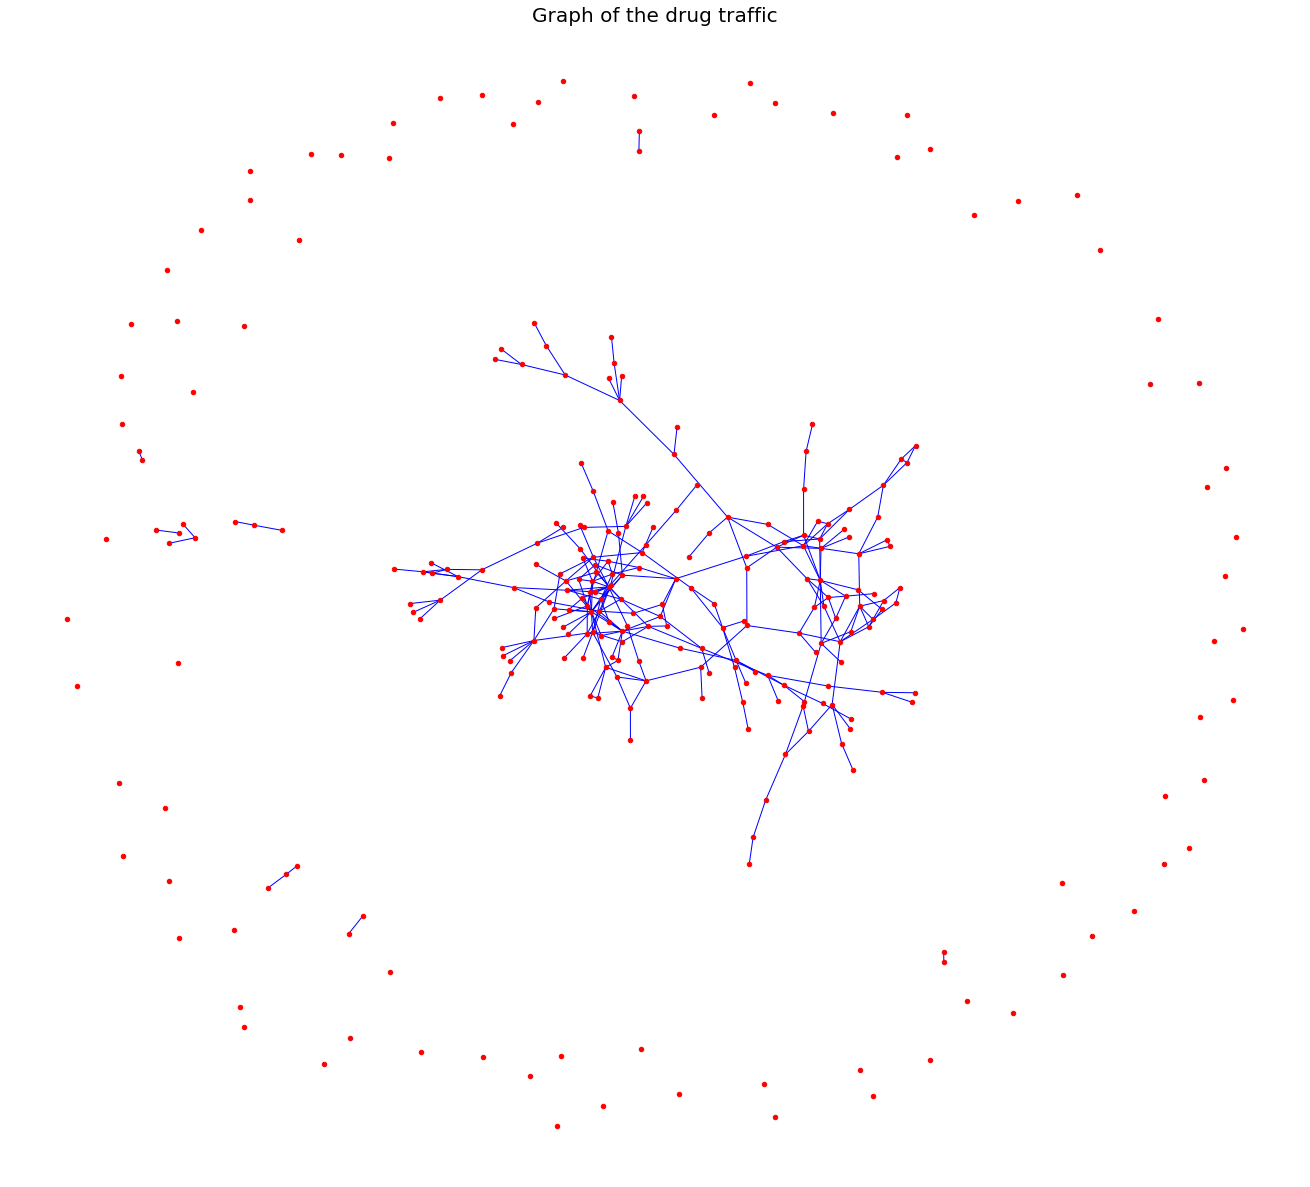

In [160]:
fname = "DRUGNET.csv"
file = open(fname, "r")

reader = csv.reader(file)

adj_matrix = []
for row in reader :
    adj_matrix.append(row)
    
file.close()

adj_matrix.remove(adj_matrix[0])

for k in range((len(adj_matrix))):
    adj_matrix[k].remove(adj_matrix[k][0])

adj_matrix = np.array(adj_matrix)

adj_matrix = adj_matrix.astype(np.int)

G = nx.convert_matrix.from_numpy_matrix(adj_matrix)

fig=plt.figure(figsize=(18, 16))

nx.draw(G, node_color = 'r', node_size = 20,edge_color = 'b')

plt.title('Graph of the drug traffic',size = 20)

There is a big connected componant in the middle of the graph. This connected component seems to contain branches (parts of the graph with no circle). A lot of people are not linked with anyone, or just one or two persons.
Let's have a look to the different connected components with more precision :

In [161]:
print('The number of connected components is '+str(nx.number_connected_components(G))+'.')

c = 0
list_size_compo = []
for k in nx.connected_components(G):
    if len(k)>1 :        
        c+=1
        list_size_compo.append(len(k))
        
print('The number of connected components which contain more than one person is '+str(c)+'.')
print('Those connected components have a size respectively of : '+str(list(k for k in list_size_compo))+'.')

The number of connected components is 90.
The number of connected components which contain more than one person is 9.
Those connected components have a size respectively of : [193, 3, 3, 2, 2, 2, 3, 2, 2].


There is a big connected component of 193 people. The other connected components are smaller, of 2 or 3 persons, exchanging drug between them. There are 81 isolated persons on this graph. They might take part in the drug traffic but with persons who are not represented on this graph. Moreover, maybe the ethnographs who have done this study have not find every involved people in the drug traffic.

One can wonder how those people interact together ? How does the network is organized ? How the hierarchy is organised ?

## 2- Who is the boss ? How is the traffic hierarchy organised ? (Study on the degree and on the centrality)

Usually, the drug traffic is organised as a hierarchy. Let's have a look if some people are more important in the traffic. They should be linked a lot with the others because they treat with many people. Let's plot the degree distribution : 

Text(0.5, 1.0, 'Histogram of the degree distribution')

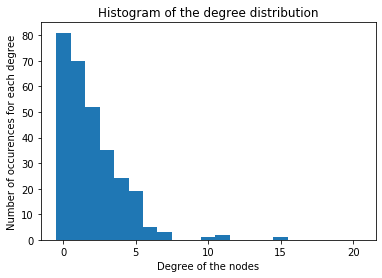

In [162]:
N = len(list(G))

list_degree = []
degree_max = max(G.degree(),key=itemgetter(1))[1]

vertices = [k for k in range(N)]
for k in vertices :
    list_degree.append(G.degree(k))
    
bins_histo = [k-0.5 for k in range (degree_max + 5)]
bins_histo.append(degree_max + 5 +0.5)


nbre = plt.hist(list_degree, bins = bins_histo)[0]
plt.xlabel('Degree of the nodes')
plt.ylabel('Number of occurences for each degree')
plt.title('Histogram of the degree distribution')

#plt.bar(list_degree[:(degree_max + 5)],nbre)

In [163]:
for k in range(degree_max+1):
    print('The number of persons having a degree of '+str(k)+' is : '+str(nbre[k])+'.')

The number of persons having a degree of 0 is : 81.0.
The number of persons having a degree of 1 is : 70.0.
The number of persons having a degree of 2 is : 52.0.
The number of persons having a degree of 3 is : 35.0.
The number of persons having a degree of 4 is : 24.0.
The number of persons having a degree of 5 is : 19.0.
The number of persons having a degree of 6 is : 5.0.
The number of persons having a degree of 7 is : 3.0.
The number of persons having a degree of 8 is : 0.0.
The number of persons having a degree of 9 is : 0.0.
The number of persons having a degree of 10 is : 1.0.
The number of persons having a degree of 11 is : 2.0.
The number of persons having a degree of 12 is : 0.0.
The number of persons having a degree of 13 is : 0.0.
The number of persons having a degree of 14 is : 0.0.
The number of persons having a degree of 15 is : 1.0.


With the degree distribution, one can see that there are a few number of persons who are linked with a lot of people. They are hubs of the graph. In contrast, a lot of people in the drug traffic are linked with a few people. This phenomena can be observed in a lot of graph from the reality. It makes them difficult to break ; as there are only a few hubs in the drug traffic, there is a low probability for the police to find them.

In general, the degree distribution of those kind of graphs follows a power law. They are called small worlds. Let's see if it is the case with the drug traffic graph by plotting the distribution in a logarithm scale :

Text(0.5, 1.0, 'Histogram of the degree distribution with a log scale')

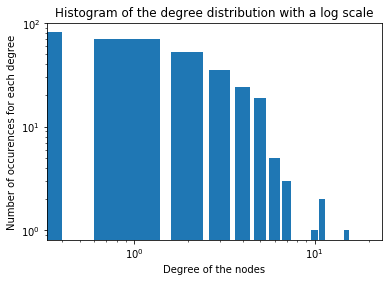

In [164]:
abscisse_histo = [k+0.5 for k in bins_histo[:-1]]
plt.bar(abscisse_histo,nbre)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree of the nodes')
plt.ylabel('Number of occurences for each degree')
plt.title('Histogram of the degree distribution with a log scale')

The distribution in a logarithm scale is not linear, so the law is not a law of power.

The biggest connected component is the most interesting connected component to study, as the other connected components are isolated person or persons connected to maximum two other persons. In the following, only the largest connected component will be studied, as the majority of the information is includeed inside. Let's have a look if it follows the small world model :

Text(0.5, 1.0, 'Histogram of the degree distribution with a log scale')

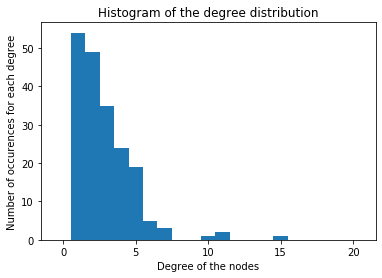

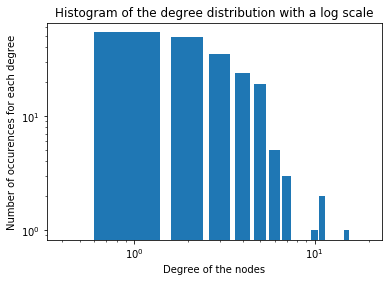

In [165]:
A = list(nx.node_connected_component(G, 42))
G1 = G.subgraph(A)

N = len(list(G1))

list_degree = []
degree_max = max(G1.degree(),key=itemgetter(1))[1]

vertices = list(nx.nodes(G1))
for k in vertices :
    list_degree.append(G1.degree(k))
    
bins_histo = [k-0.5 for k in range (degree_max + 5)]
bins_histo.append(degree_max + 5 +0.5)

fig1 = plt.figure()

nbre = plt.hist(list_degree, bins = bins_histo)[0]
plt.xlabel('Degree of the nodes')
plt.ylabel('Number of occurences for each degree')
plt.title('Histogram of the degree distribution')

fig2 = plt.figure()

abscisse_histo = [k+0.5 for k in bins_histo[:-1]]
plt.bar(abscisse_histo,nbre)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree of the nodes')
plt.ylabel('Number of occurences for each degree')
plt.title('Histogram of the degree distribution with a log scale')

It does not follow a power law neither. The largest connected component is not a small world model.

Now, let's look for the four main hubs of this drug traffic.

In [166]:
main_hubs = []
vertices = [k for k in range(len(list(nx.nodes(G1))))]
other_vertices = copy.copy(vertices)
list_degree = [k[1] for k in G1.degree()]

for k in vertices :
    if list_degree[k]>=10 :
        main_hubs.append(k)
        other_vertices.remove(k)
    if list_degree[k]>=15 :
        main = k
print('The four main hubs of the drug traffic are referenced by the numbers '+str(main_hubs)+' in the list of vertices.')
print('The main hub of the drug traffic is referenced by the numbers '+str(main)+' in the list of vertices.')


The four main hubs of the drug traffic are referenced by the numbers [26, 33, 42, 51] in the list of vertices.
The main hub of the drug traffic is referenced by the numbers 42 in the list of vertices.


Let's see where those hubs are situated in the graph.

Text(0.5, 1.0, 'Localisation of the main hubs of the graph')

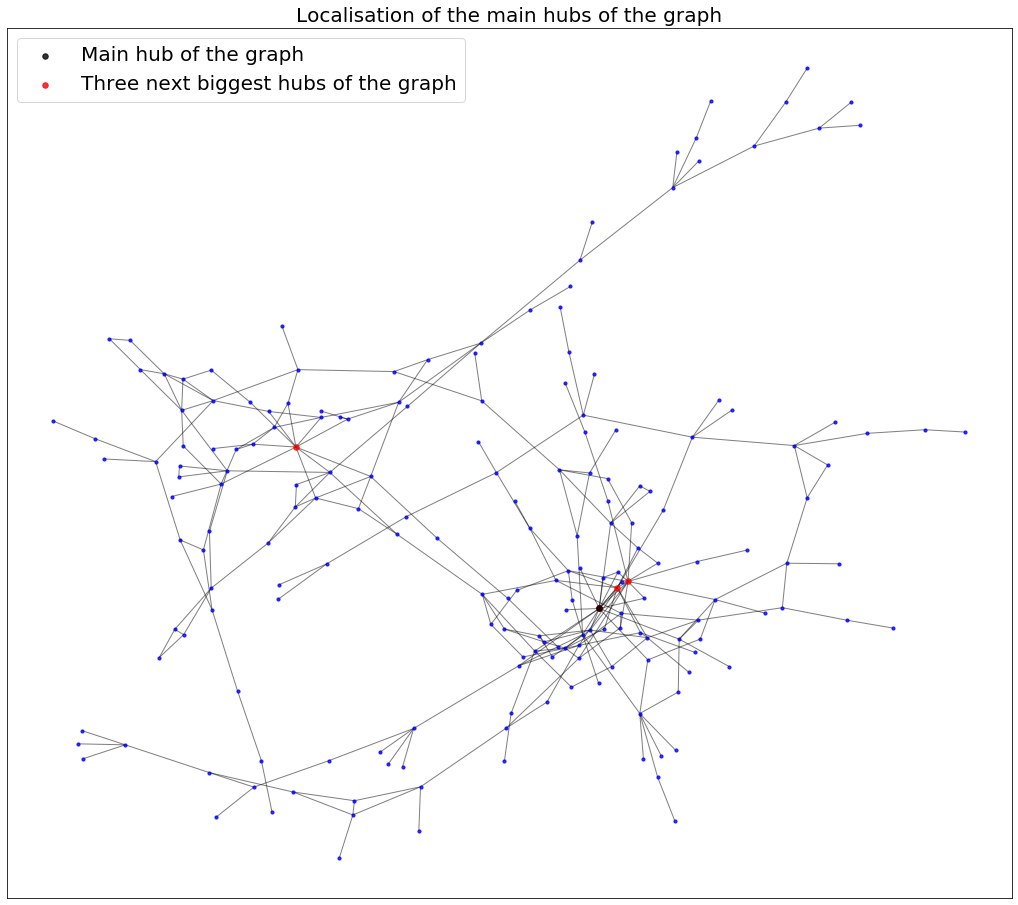

In [167]:
main_hubs = []
vertices = G1.nodes()
other_vertices = copy.copy(vertices)
other_vertices = list(other_vertices)

for k in vertices :
    if G.degree(k)>=10 :
        main_hubs.append(k)
        index = other_vertices.index(k)
        del other_vertices[index]
    if G.degree(k)>=15 :
        main = k

pos=nx.spring_layout(G1)

fig=plt.figure(figsize=(18, 16))

nx.draw_networkx_nodes(G1,pos,
                       nodelist=[main],
                       node_color='black',
                       node_size=30,
                   alpha=0.8,
                      label = 'Main hub of the graph')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=main_hubs,
                       node_color='r',
                       node_size=30,
                   alpha=0.8,
                      label = 'Three next biggest hubs of the graph')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=[main],
                       node_color='black',
                       node_size=30,
                   alpha=0.8)

nx.draw_networkx_nodes(G1,pos,
                       nodelist=other_vertices,
                       node_color='b',
                       node_size=10,
                   alpha=0.8)


nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.5)

plt.legend(prop={'size': 20})
plt.title('Localisation of the main hubs of the graph',size = 20)


The main hub is colored in black, while the three other main hubs are colored in red. They seem to be situated in the center of different commununities. They are probably at the top of the hierarchy traffic. Three of them are linked. They might be the heart of the organisation. They have a high centrality in degree. There are a lot of way to define centrality. Let's have a look to some relevant centralities for our problem.

First, let's plot the degree centrality for all the main connected component :

The person who has the biggest degree centrality is indexed by : 42


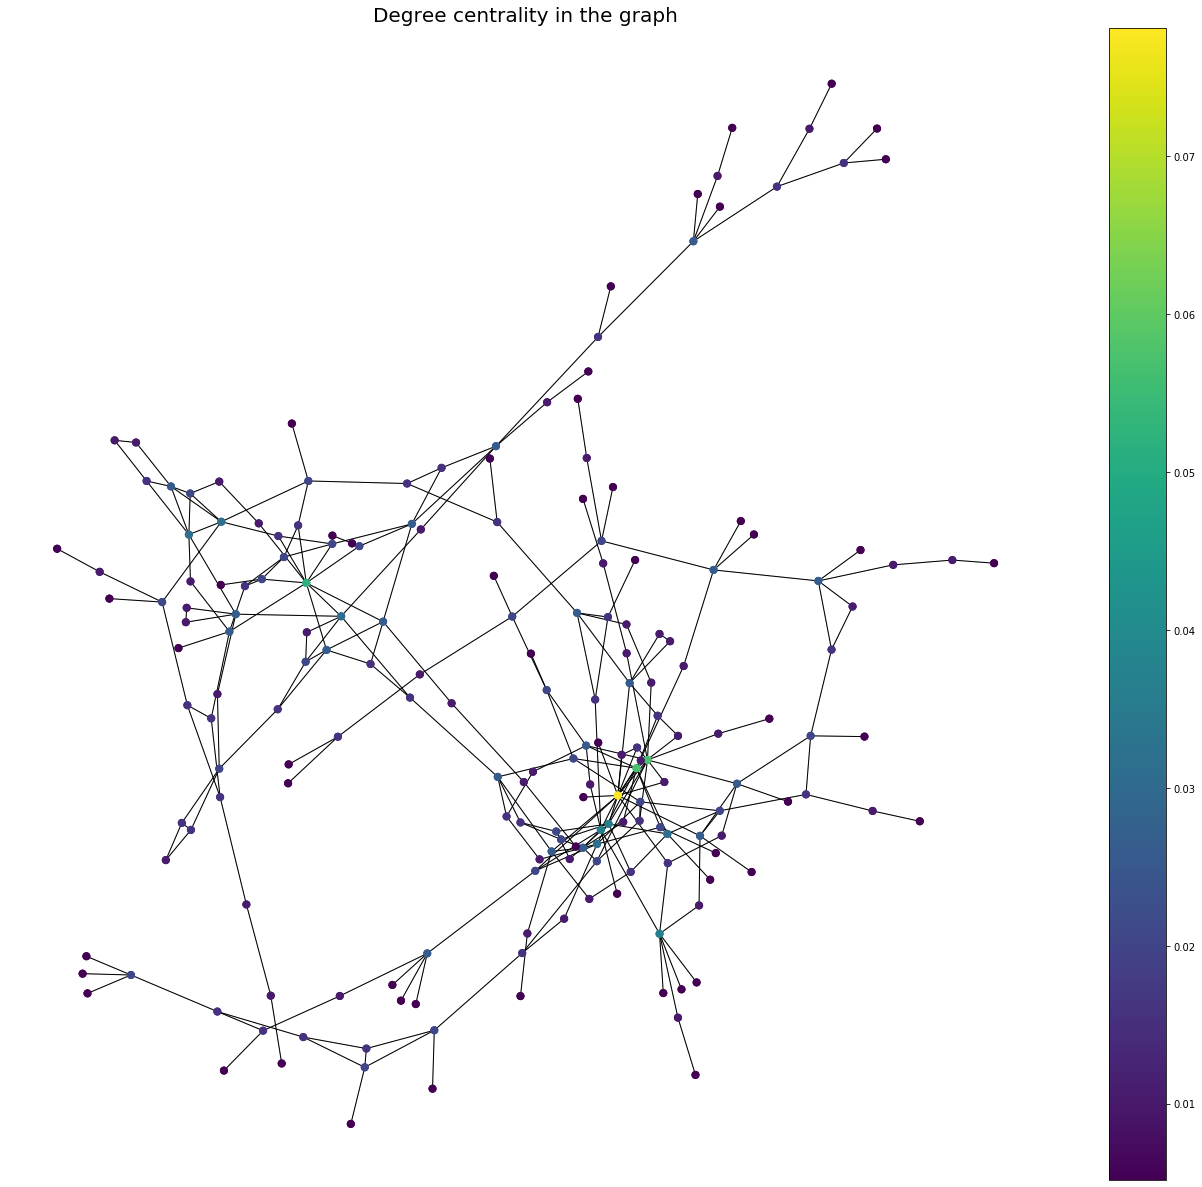

In [168]:
centrality_degree = nx.degree_centrality(G1)
list_centrality_degree = [ v for v in centrality_degree.values() ]
fig=plt.figure(figsize=(18, 16))
g = nx.draw(G1, pos, node_color=list_centrality_degree, node_size=50)

print('The person who has the biggest degree centrality is indexed by : '+str(list_centrality_degree.index(max(list_centrality_degree))))

ec = nx.draw_networkx_edges(G1, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G1, pos, node_color=list_centrality_degree, node_size=50)
plt.colorbar(nc)

plt.title('Degree centrality in the graph',size = 20)
plt.show()


The hubs are again found, linked with a lot of people. People in the border of the graph have a small degree centrality. It is explained by the fact that the sides of the graph are often path subgraph, or have a branch structure (cf part 1). Drug is given to someone who gives it to an other person who gives it to an other person etc ... So, in the sides of the graph, people are only passing drug from one person to an other one. They have a low degree distribution. They are low in the hierarchy as well.
So, when one person low in the hierarchy is caught by the police or leaves the traffic (ie. when one of those nodes is deleted), connected components are created. Let's have a look to the betweeness centrality, which quantifies the importance of one node to connect the other nodes.

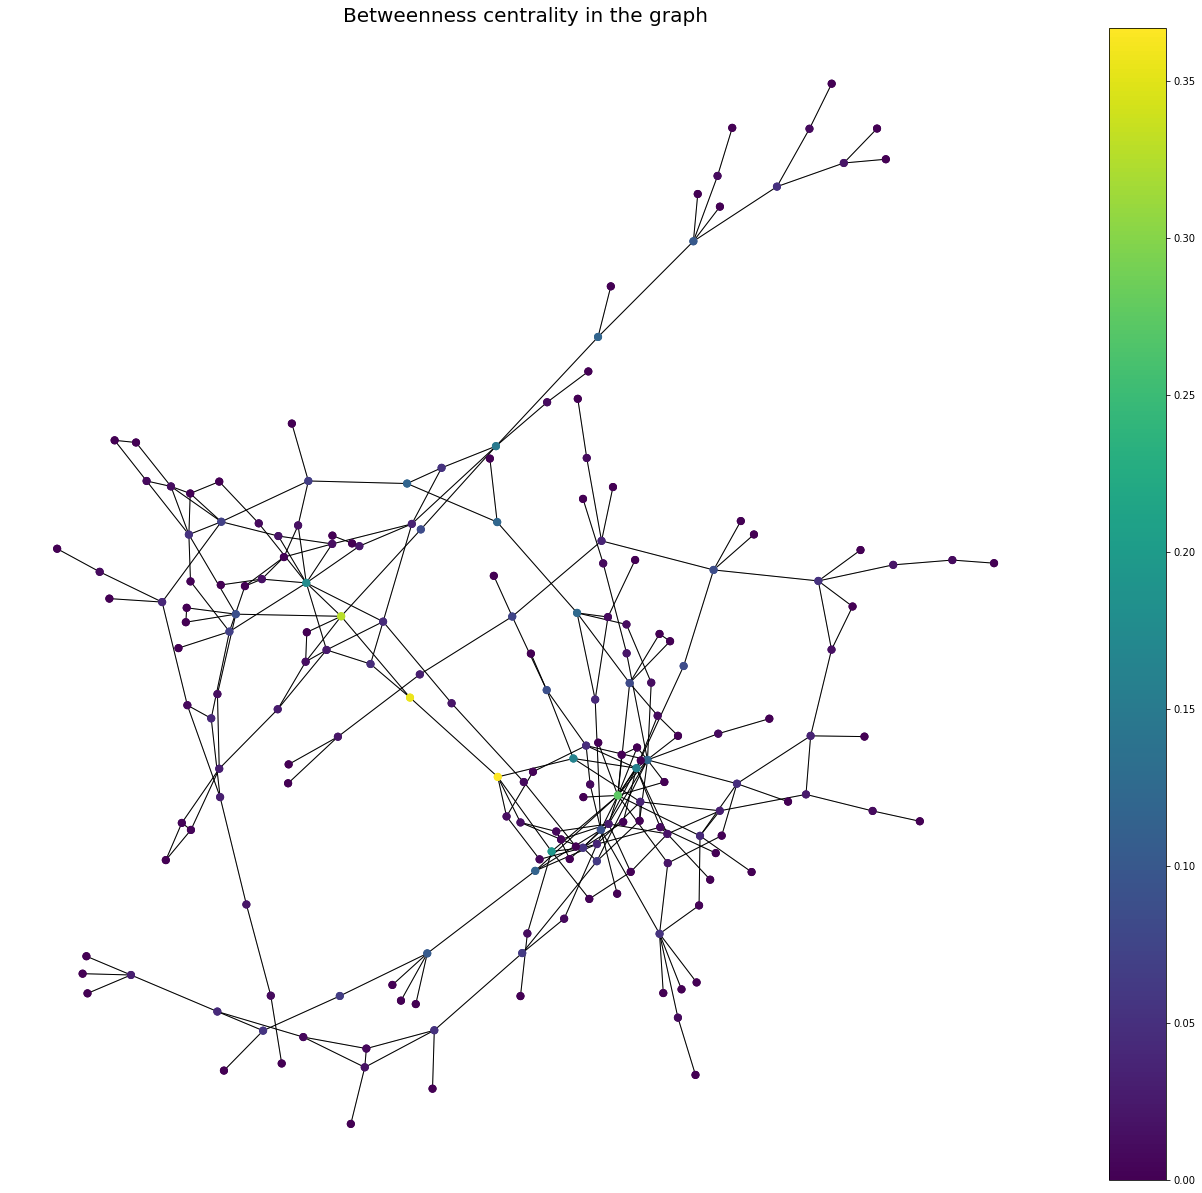

In [169]:
centrality_degree = nx.betweenness_centrality(G1)
list_centrality_betweenness = [ v for v in centrality_degree.values() ]
fig=plt.figure(figsize=(18, 16))
g = nx.draw(G1, pos, node_color=list_centrality_betweenness, node_size=50)

ec = nx.draw_networkx_edges(G1, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G1, pos, node_color=list_centrality_betweenness, node_size=50)
plt.colorbar(nc)
plt.title('Betweenness centrality in the graph',size = 20)
plt.show()

The nodes with the largest betweenness centralities seem to be in between two 'communities' that can be seen with the eye (the real communities will be seen later). They seem to be the link between those communities. They are not in the middle of paths subgraphs situated at the sides of the graph. It is due to the fact that people situated there make the connection between the traffic and a path, which represents to only a few people. People who have a high betweenness centrality are very important to connect the different people of the graph. 

How are centrality in degree and centrality in betweenness are correlated ? Let's plot the both centrality for each node :

Text(0.5, 1.0, 'Centrality in degree versus centrality in betweenness')

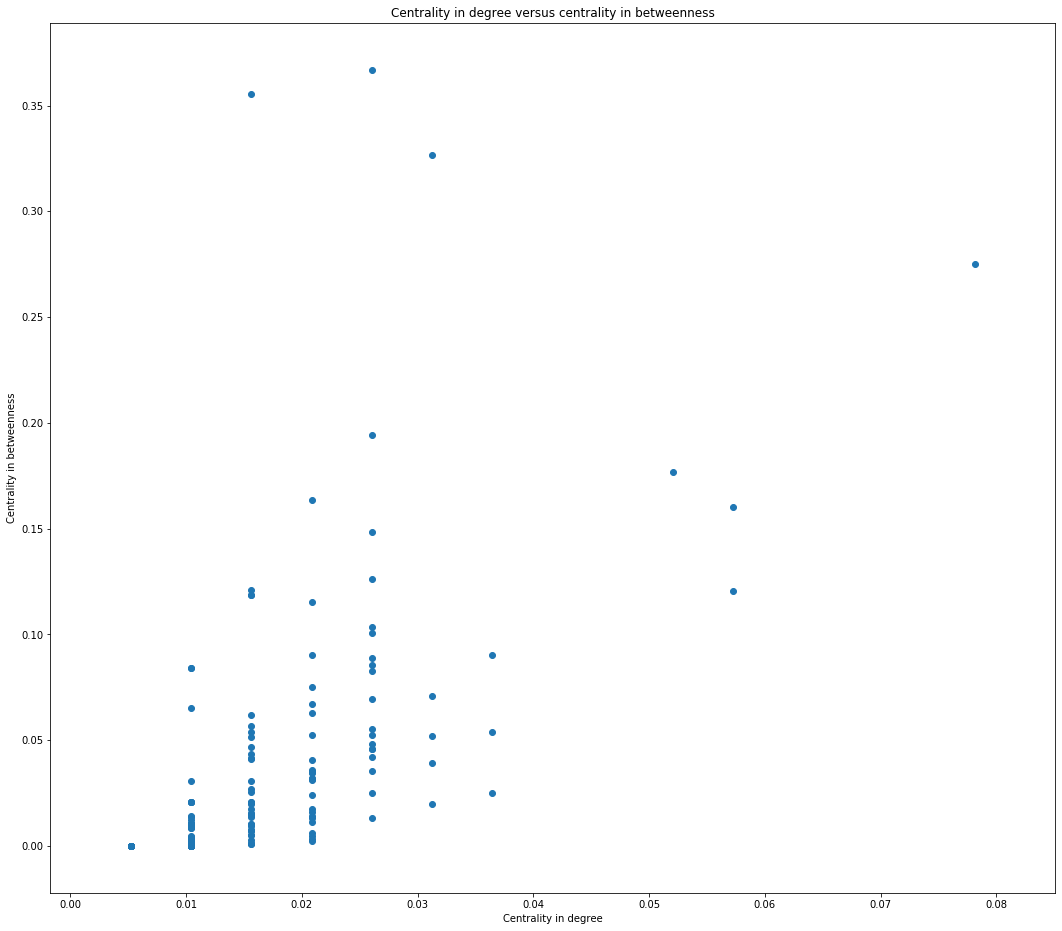

In [170]:
fig=plt.figure(figsize=(18, 16))
plt.scatter(list_centrality_degree,list_centrality_betweenness,)
plt.xlabel('Centrality in degree')
plt.ylabel('Centrality in betweenness')
plt.title('Centrality in degree versus centrality in betweenness')

A lot of nodes have a low centrality in degree and a low centrality in betweenness. However, three nodes have a low centrality in degree but a high centrality in betweenness. Those people are not connected to a lot of people but are bridges to join the different communities of the graph. To the opposite, three other nodes have a high centrality in degree but a low centrality in betweennness. Those persons are linked to many people, but their deletion would not affect so much the network. They might be important persons in the center of a community. Only one person have a high centrality both in degree and in betweenness. This person is connected to a lot of people, and linked communities. He or she may be the big boss of the drug traffic : connected to many peole and linking different connunities

Let's have a look with Gephy. The next figure is the graph, on which the size of the nodes is proportionnal to the degree of the node, and the green shade of the node is its betwweenness centrality. The visualisation is the Yifan Hu, which can visualize communities.

![Graph representation from Gephi](graph.png)

## 3- Organisation of the traffic, to pass drugs and informations

The shape of the graph looks like the one of a tree : the 'end' of traffic chanels seem to be path subgraphs. But it is not.

In [171]:
A = list(nx.node_connected_component(G, 42))
G1 = G.subgraph(A)
print('The main component of the graph is a tree is a '+str(nx.is_tree(G1))+' affirmation.')

The main component of the graph is a tree is a False affirmation.


The graph is not a tree. One can check if it is closed to a tree structure with the clustering coefficient. It is a way to check if people who are connected with the same person are more likely to be connected.

In [172]:
print('The clustering coefficient of the graph is '+str(nx.transitivity(G1))+'.')

The clustering coefficient of the graph is 0.11851015801354402.


Let's compare those values with a random graph, built with the configuration method. This random graph allows to conserve the degree distribution, that is why I have chosen this random graph. Those type of graphs usually have a clustering coefficient rather small, but a large majority of the random graphs have a small clustering coefficient. The ones which have not a small clustering coefficient need it as a parameter, or do not give correct results with the parameters of the drug traffic. With the random graph (from which the big boss is determined as above), the values obtained are the following :

In [173]:
K = list(k[1] for k in list(nx.degree(G1)))
degree_mean = int(sum(K)/len(K))
G2 = nx.configuration_model(list_degree , create_using=None, seed=None)
G3 = nx.Graph(G2)
print('The clustering coefficient of the random graph is '+str(nx.transitivity(G3))+'.')

The clustering coefficient of the random graph is 0.013937282229965157.


We obtain a high value for the clusterinf coefficient of the traffic graph, in comparaison to the value of the random graph, even if the value of the random graph is rather small. This is the proportion of a triangles in the graph, which means that if someone has a link with two other persons, there is a rather high probability that those two persons are linked. It is due to the fact that in the core of the graph, people are linked a lot, even if there are large parts of paths (the drug is given to a person who gives it to someone else etc ...).

The diameter must be quite high, because of the several path graphs. That is what we will check :

In [174]:
print('The diameter of the graph is : '+str(nx.diameter(G1))+'.')

J = [len(k) for k in list(nx.connected_components(G3))]
Z = max(J)
ind = J.index(Z)
ele = list(list(nx.connected_components(G3))[ind])[0]


A1 = list(nx.node_connected_component(G3,ele ))
G4 = G3.subgraph(A1)

print('The diameter of the biggest connected component of a random graph is :'+str(nx.diameter(G4)))

The diameter of the graph is : 18.
The diameter of the biggest connected component of a random graph is :13


The diameter has a higher value than the one of a random graph made from the configuration model, as it was forcast above.

To compute the distances between people in the graph is not very relevant because one people from one side of the drug traffic has no reason to communicate with one other person in the other side of the drug traffic. The person who would want to pass information across the graph is the big boss of the drug traffic. Let's have a look to his average distance with the members of the traffic :

In [175]:
list_path = [nx.single_source_shortest_path_length(G1, 42)[k] for k in list(nx.nodes(G1))]
print('The average distance from the big boss to someone in the graph is :'+str(sum(list_path)/len(list_path))+'.')
print('The longest distance from the big boss to someone in the graph is :'+str(max(list_path))+'.')

The average distance from the big boss to someone in the graph is :6.601036269430052.
The longest distance from the big boss to someone in the graph is :13.


In [176]:
list_rg_degree = [k[1] for k in G2.degree()]
maxi = max(list_rg_degree)
index_maxi = list_rg_degree.index(maxi)
list_path = [nx.single_source_shortest_path_length(G2, index_maxi)[k] for k in list(nx.single_source_shortest_path_length(G2, index_maxi).keys())]
print('The average distance from the big boss to someone in the random graph is :'+str(sum(list_path)/len(list_path))+'.')
print('The longest distance from the big boss to someone in the random graph is :'+str(max(list_path))+'.')

The average distance from the big boss to someone in the random graph is :3.418848167539267.
The longest distance from the big boss to someone in the random graph is :8.


The distance from the boss to other members of the traffic are quite long compared to the ones of the random graph. It is conveniant because if someone is caught by the police, it is harder to find the boss. However, to pass drug and informations is longer so it is more risky.

## 4- Detection of communities

An important aspect of a drug traffic is the communities inside it. Let's have a look to them first with the Girvan Newman method. It detects communities by progressively removing edges from the original network and look for connected components.

Text(0.5, 1.0, 'Different communities detected in the drug traffic graph, colored by community')

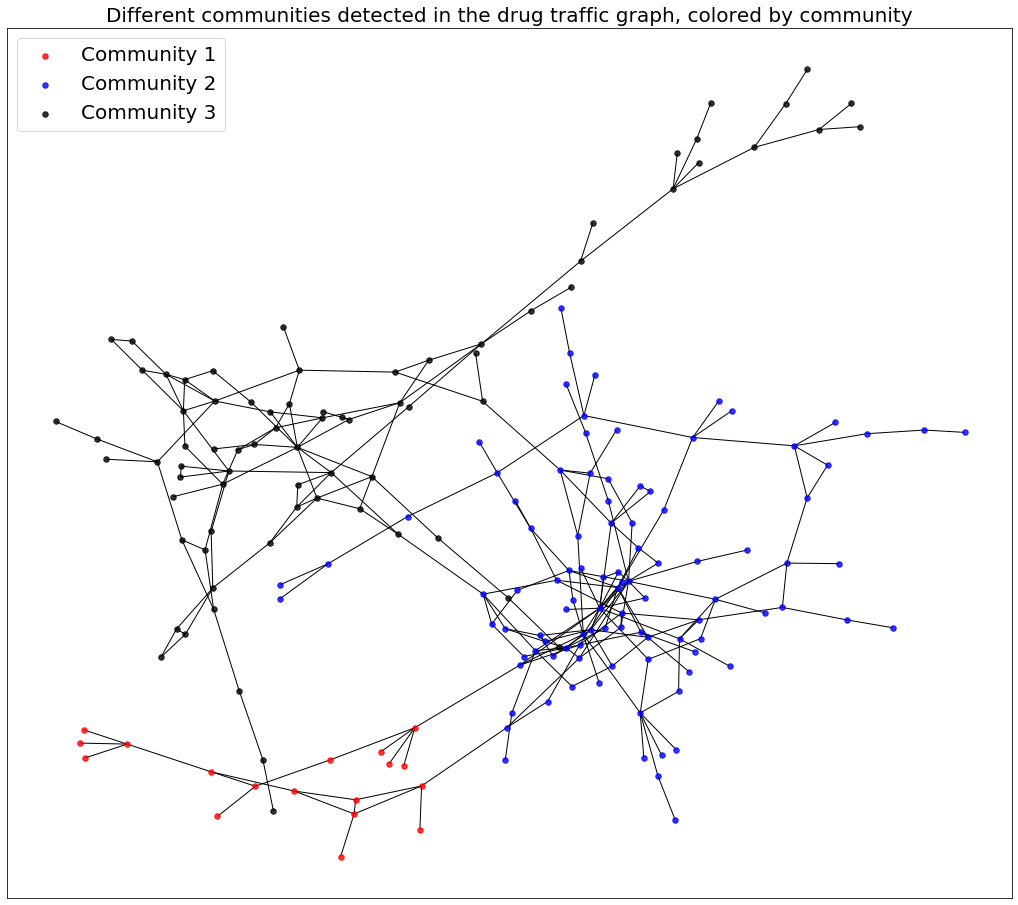

In [177]:
import networkx.algorithms.community as nac

communities_generator = nac.girvan_newman(G1)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

fig=plt.figure(figsize=(18, 16))

nx.draw_networkx_nodes(G1,pos,
                       nodelist=sorted(map(sorted, next_level_communities))[0],
                       node_color='r',
                       node_size=30,
                   alpha=0.8,
                      label = 'Community 1')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=sorted(map(sorted, next_level_communities))[1],
                       node_color='b',
                       node_size=30,
                   alpha=0.8,
                      label = 'Community 2')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=sorted(map(sorted, next_level_communities))[2],
                       node_color='black',
                       node_size=30,
                   alpha=0.8,
                      label = 'Community 3')

plt.legend(prop={'size': 20})
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=1)
plt.title('Different communities detected in the drug traffic graph, colored by community',size = 20)

There seems to exist three communities. One can question about the causes of such a repartition. The datas of the ethnicity and the gender of the people are available. Let's compute them to see if people who belong to a certain ethnicity or have a certain gender are in a certain community. First, let's plot the graph colored in fonction of the ethnicity of the people.

Text(0.5, 1.0, 'Graph of the repartition of ethnicity in the drug traffic')

<Figure size 1296x1152 with 0 Axes>

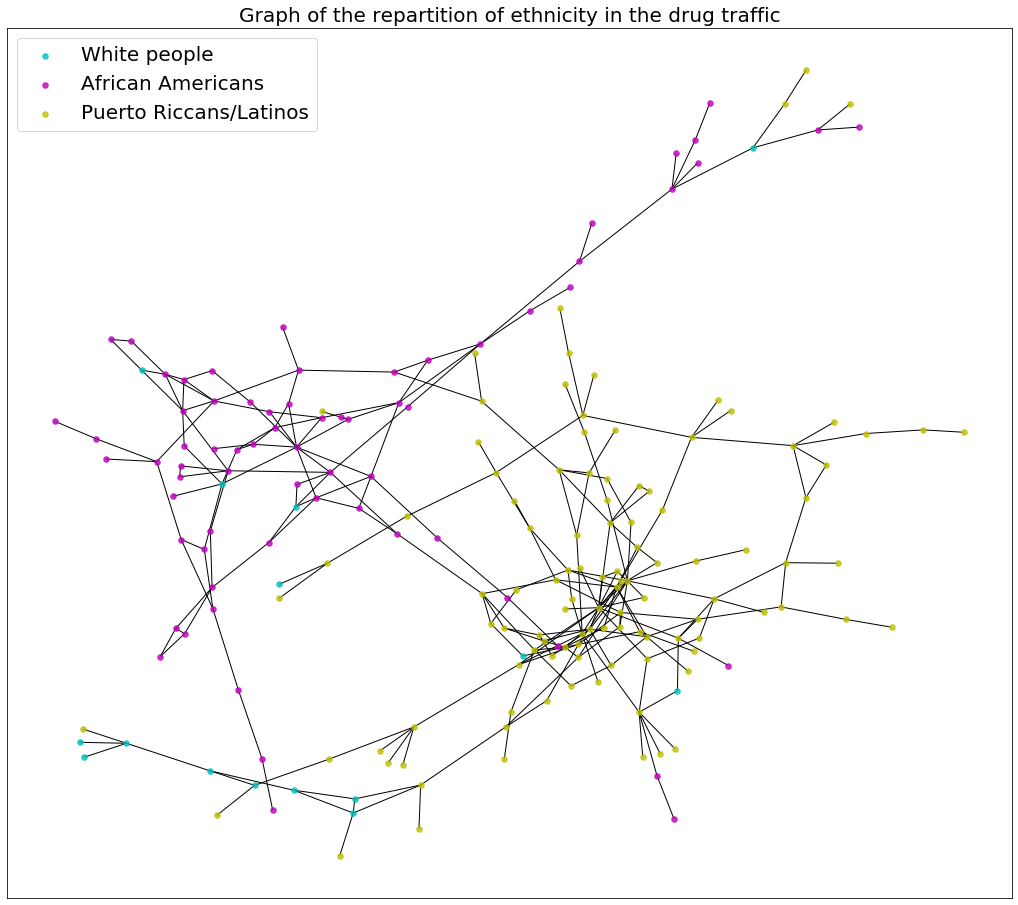

In [178]:
data2 = pd.read_csv("DRUGATTR.csv")

fname1 = "DRUGATTR.csv"
file1 = open(fname1, "r")

reader1 = csv.reader(file1)

charac_vertices = []
for row in reader1 :
    charac_vertices.append(row)
    
file1.close()

charac_vertices.remove(charac_vertices[0])

charac_vertices = np.array(charac_vertices)

charac_vertices = charac_vertices.astype(np.int)

vertices1 = np.array([[k[0] for k in charac_vertices]])

ethnicity1 = np.array([[k[1] for k in charac_vertices]])

gender1 = np.array([[k[2] for k in charac_vertices]])

ethnicity2 = np.array([k[1] for k in charac_vertices])
ethnicity3 = []
for k in list(G1.nodes()):
    if (ethnicity2[k]==5 or ethnicity2[k]==6 or ethnicity2[k]==7):
        ethnicity2[k]=1
    ethnicity3.append(ethnicity2[k])
    
fig=plt.figure(figsize=(18, 16))





white = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if ethnicity3[k]==1]
african_american = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if ethnicity3[k]==2]
latinos = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if ethnicity3[k]==3]


f=plt.figure(figsize=(18, 16))

nx.draw_networkx_nodes(G1,pos,
                       nodelist=white,
                       node_color='c',
                       node_size=30,
                   alpha=0.8,
                      label = 'White people')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=african_american,
                       node_color='m',
                       node_size=30,
                   alpha=0.8,
                      label = 'African Americans')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=latinos,
                       node_color='y',
                       node_size=30,
                   alpha=0.8,
                      label = 'Puerto Riccans/Latinos')

nx.draw_networkx_edges(G1,pos,width=1.0,alpha=1)
plt.legend(prop={'size': 20})
plt.title('Graph of the repartition of ethnicity in the drug traffic',size = 20)

One can observe that two large communities emerge : the one of Puerto Riccans/Latinos and the one of African American. People who belong to the white ethnicity form a small community, and a lot of them are spread in the graph. Ethnicity seems to be strongly linked with the different communities detected before. Let's have a look to the correlation between the ethnicity and the communities detected before :

In [179]:
community = sorted(map(sorted, next_level_communities))

c = 0
empirical_communities = [[],[],[]]

# the first element correspond to the 'white' ethnicity

for k in community[0]:
    if (charac_vertices[k][1]==1):
        c+=1
        empirical_communities[0].append(k)

# the second element corresponds to the 'Puerto Riccans/Latinos' ethnicity

for k in community[2]:
    if (charac_vertices[k][1]==2):
        c+=1
        empirical_communities[2].append(k)
        
# the third element corresponds to the 'African American' ethnicity

for k in community[1]:
    if (charac_vertices[k][1]==3):
        c+=1
        empirical_communities[1].append(k)
       
print('The pourcentage of correlation between the detected communities and the ethnicity is '+str(c/len(list(G1.nodes()))*100)+' %.')

The pourcentage of correlation between the detected communities and the ethnicity is 86.52849740932642 %.


The link between the community and the ethnicity is very high. It can be explained by the fact that social mixity in the USA is very weak ; people tend to stay with persons from the same ethnicity. In reference [2], the drug networks are usually organised by ethnicities. The studied graph might be two traffic gangs which are linked together.

Let's have a look now to the repartition of men and women in the graph. 

Text(0.5, 1.0, 'Graph of the repartition of gender in the drug traffic')

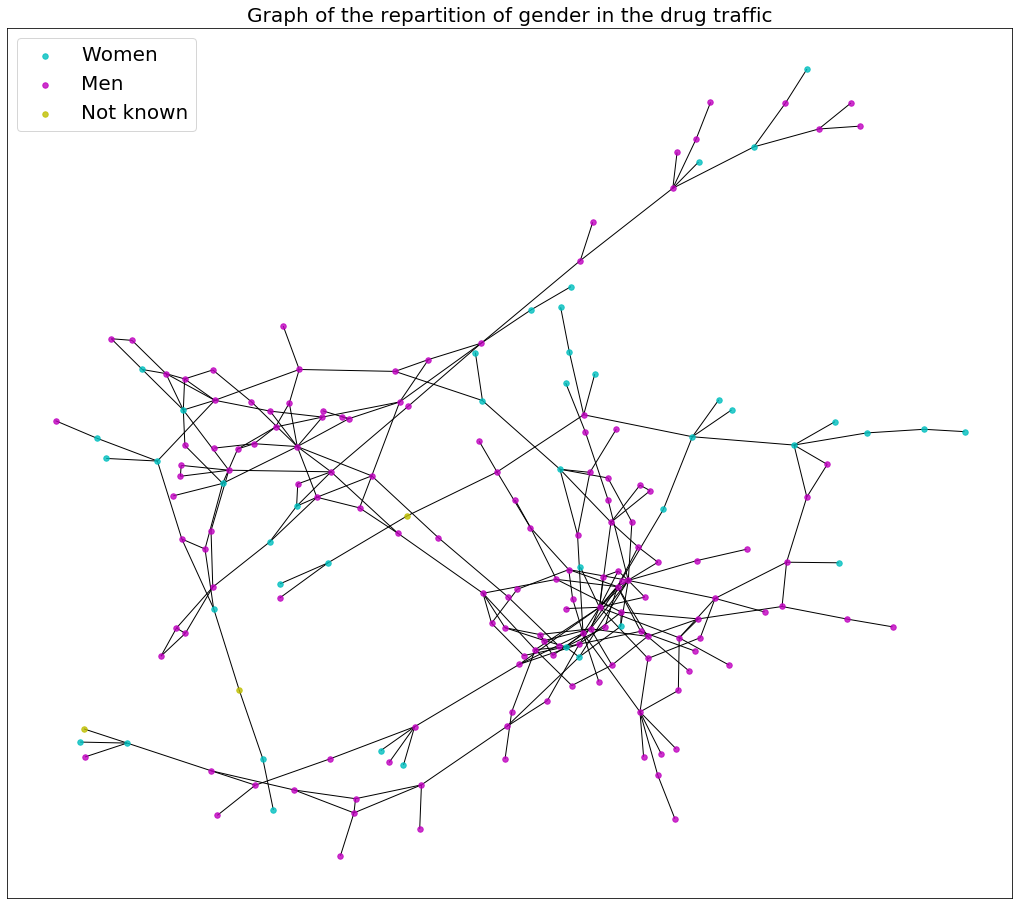

In [180]:
gender2 = np.array([k[2] for k in charac_vertices])
gender3 = []
for k in list(G1.nodes()):
    gender3.append(gender2[k])

women = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if gender3[k]==2]
men = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if gender3[k]==1]
not_known = [list(G1.nodes())[k] for k in range(len(list(G1.nodes()))) if gender3[k]==0]


f=plt.figure(figsize=(18, 16))

nx.draw_networkx_nodes(G1,pos,
                       nodelist=women,
                       node_color='c',
                       node_size=30,
                   alpha=0.8,
                      label = 'Women')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=men,
                       node_color='m',
                       node_size=30,
                   alpha=0.8,
                      label = 'Men')

nx.draw_networkx_nodes(G1,pos,
                       nodelist=not_known,
                       node_color='y',
                       node_size=30,
                   alpha=0.8,
                      label = 'Not known')

nx.draw_networkx_edges(G1,pos,width=1.0,alpha=1)
plt.legend(prop={'size': 20})
plt.title('Graph of the repartition of gender in the drug traffic',size = 20)

Women seem to be spread all over the graph. Let's have a look in details.

In the society, women tend to have a low place in the hierarchy for jobs. Let's see if the same phenomenon can be observed in the network. Here is the distribution of the centrality for men and women.

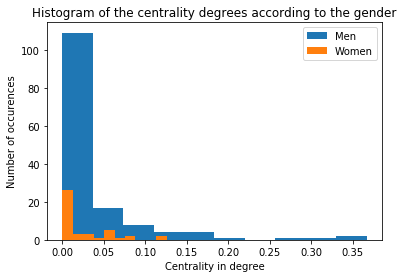

In [181]:
N = len(list(G1))
nodes_men = []
nodes_women = []
degree_men = []
degree_women = []
list_centrality_degree = [v for v in centrality_degree.values()]

vertices = [list(G.nodes())]

for index_petit in range(len(list(G1.nodes()))):
    
    index_grand = list(G.nodes()).index(list(G1.nodes())[index_petit])
    
    if (charac_vertices[index_grand][2] == 2):
        
        nodes_women.append(charac_vertices[index_grand][0])
        degree_women.append(list_centrality_degree[index_petit])
        
    if (charac_vertices[index_grand][2] == 1):
        
        nodes_men.append(charac_vertices[index_grand][0])
        degree_men.append(list_centrality_degree[index_petit])

plt.hist(degree_men)
plt.hist(degree_women)
plt.xlabel('Centrality in degree')
plt.ylabel('Number of occurences')
plt.title('Histogram of the centrality degrees according to the gender')

labels= ["Men","Women"]
plt.legend(labels)

Women are not present among the big hubs of the traffic. They are not linked to many people so they have probably less responsabilities. Do they have an important role to link communities ?

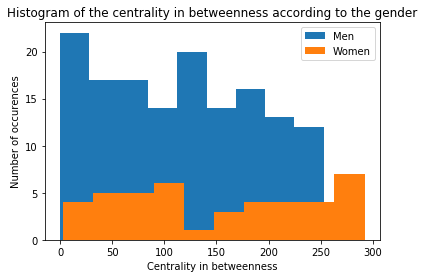

In [182]:
N = len(list(G1))
nodes_men = []
nodes_women = []
degree_men = []
degree_women = []
list_centrality_degree = [v for v in list(nx.betweenness_centrality(G1))]

vertices = [list(G.nodes())]

for index_petit in range(len(list(G1.nodes()))):
    
    index_grand = list(G.nodes()).index(list(G1.nodes())[index_petit])
    
    if (charac_vertices[index_grand][2] == 2):
        
        nodes_women.append(charac_vertices[index_grand][0])
        degree_women.append(list_centrality_degree[index_petit])
        
    if (charac_vertices[index_grand][2] == 1):
        
        nodes_men.append(charac_vertices[index_grand][0])
        degree_men.append(list_centrality_degree[index_petit])

plt.hist(degree_men)
plt.hist(degree_women)
plt.xlabel('Centrality in betweenness')
plt.ylabel('Number of occurences')
plt.title('Histogram of the centrality in betweenness according to the gender')

labels= ["Men","Women"]
plt.legend(labels)

Women seem to have higher betwweenness centralities than men. They do more likely the link between the main communities.

## 5- Conclusion

The drug traffic has a hierarchical organisation, with a boss, and important people to link the communities. Those communities are ruled by ethnic appartenances. Women are well represented in the traffic but are not in the more important occupations. 

An other aspect of the drug traffic that can be studies are the family ties. In the reference [2], it is emphasized that a gang can be organized around a family. Unfortunatly, those datas are not available with this study.

## 6- Bibliographie

[1] : WEEKS, M. R., CLAIR, S., BORGATTI, S. P., RADDA, K. & SCHENSUL, J. J. 2002. Social networks of drug users in high-risk sites: Finding the connections. AIDS and Behaviour, 6, 193-206.

[2] : https://en.wikipedia.org/wiki/Drug_trafficking_organizations#Structure